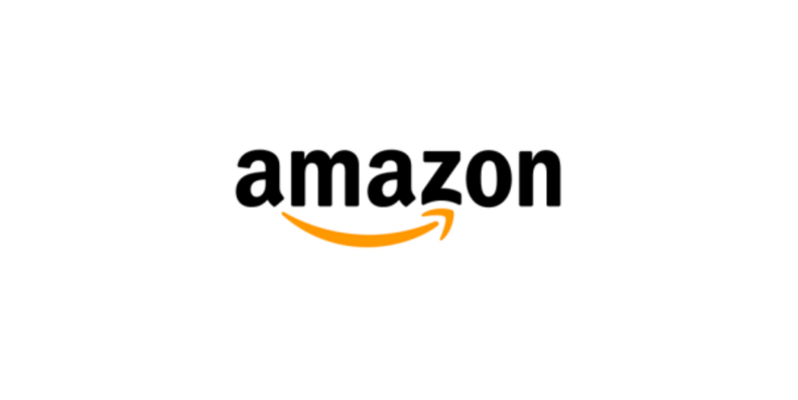
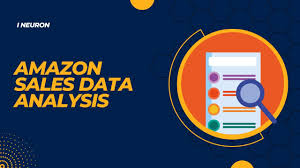
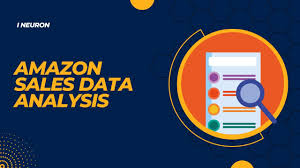
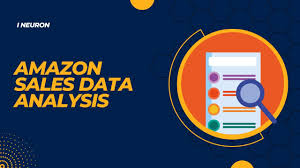
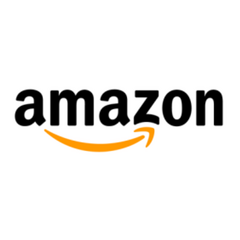
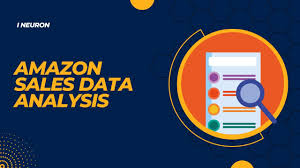
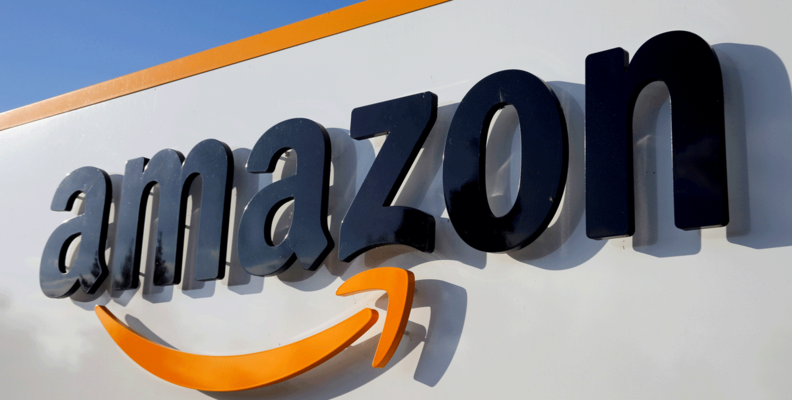


## 📘 Dataset Overview
This dataset contains comprehensive information about Amazon products, including pricing, discounts, ratings, reviews, and other relevant metadata. It includes over 1,000 products collected through web scraping using BeautifulSoup and WebDriver.  

**Key Features:**  
- `product_id` → Unique identifier for each product  
- `product_name` → Name of the product  
- `category` → Product category (e.g., electronics, clothing)  
- `discounted_price` → Price after discount  
- `actual_price` → Original listed price  
- `discount_percentage` → Discount applied in percentage  
- `rating` → Average customer rating  
- `rating_count` → Number of ratings received  
- `about_product` → Short product description  
- `user_id`, `user_name` → Reviewer details  
- `review_id`, `review_title`, `review_content` → Review information  
- `img_link`, `product_link` → Product image and official link  

**Source:** Scraped from Amazon official website  
**License:** CC BY-NC-SA 4.0  

## 💡 Business Objective
E-commerce platforms generate enormous volumes of data daily. The challenge lies in identifying the factors that influence product sales. This dataset provides the opportunity to:  
- Analyze the effect of pricing, discounts, and customer reviews  
- Determine high-performing product categories  
- Understand how ratings and reviews impact purchasing decisions  
- Identify patterns in product performance to inform business strategy  

## 🎯 Analysis Goals
- Conduct exploratory data analysis (EDA) on product pricing, discounts, and reviews  
- Visualize relationships and patterns among different attributes  
- Pinpoint the main factors driving product success  
- Build predictive models for sales forecasting or product classification  
- Generate actionable insights to optimize marketing and pricing strategies  


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">1. Data Loading & Initial Examination</p>

## 1.1 Import Libraries

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots in the notebook
%matplotlib inline

# Scikit-learn Modules
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler

# XGBoost
from xgboost import XGBRegressor

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


## 1.2 Load the Dataset

In [2]:
df= pd.read_csv("/kaggle/input/amazon-sales-dataset/amazon.csv")

## 1.3 Preview the Dataset

In [3]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


###  Let's see the columns

In [4]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

## 1.4 Column Names and  Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [6]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

## 👀 Observations

- Dataset Info: 1,465 entries, 16 columns including product details, prices, ratings, and reviews.

- Missing Values: Only rating_count has 2 missing entries; others are complete.

- Data Types: Numeric columns (discounted_price, actual_price, discount_percentage, rating, rating_count) are stored as objects and need conversion.

- Next Steps: Clean numeric columns, convert types, handle missing rating_count values.

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">2. Data Cleaning|Preprocessing</p>

## 2.1. Clean numeric columns and Convert prices to float

In [7]:

# Convert to string first, then remove ₹ and commas
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '')
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '')

# Convert to float safely
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

# Remove % from discount and convert to float
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# Convert rating to float safely
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Remove commas from rating_count and convert to int safely
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')


## 2.2 Handle missing values and Verify changes

In [8]:

# Fill missing numeric values with median
df['rating'].fillna(df['rating'].median(), inplace=True)
df['rating_count'].fillna(df['rating_count'].median(), inplace=True)

#  Verify changes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [9]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df.describe()

Number of duplicate rows: 0


,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,47.691468,4.096587,18277.634812
std,6944.304394,10874.826864,21.635905,0.291574,42727.398216
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1191.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17325.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">3. Data Visualization</p>

# 🔹 Univariate Analysis
## 3.1  Distribution of Numerical Features

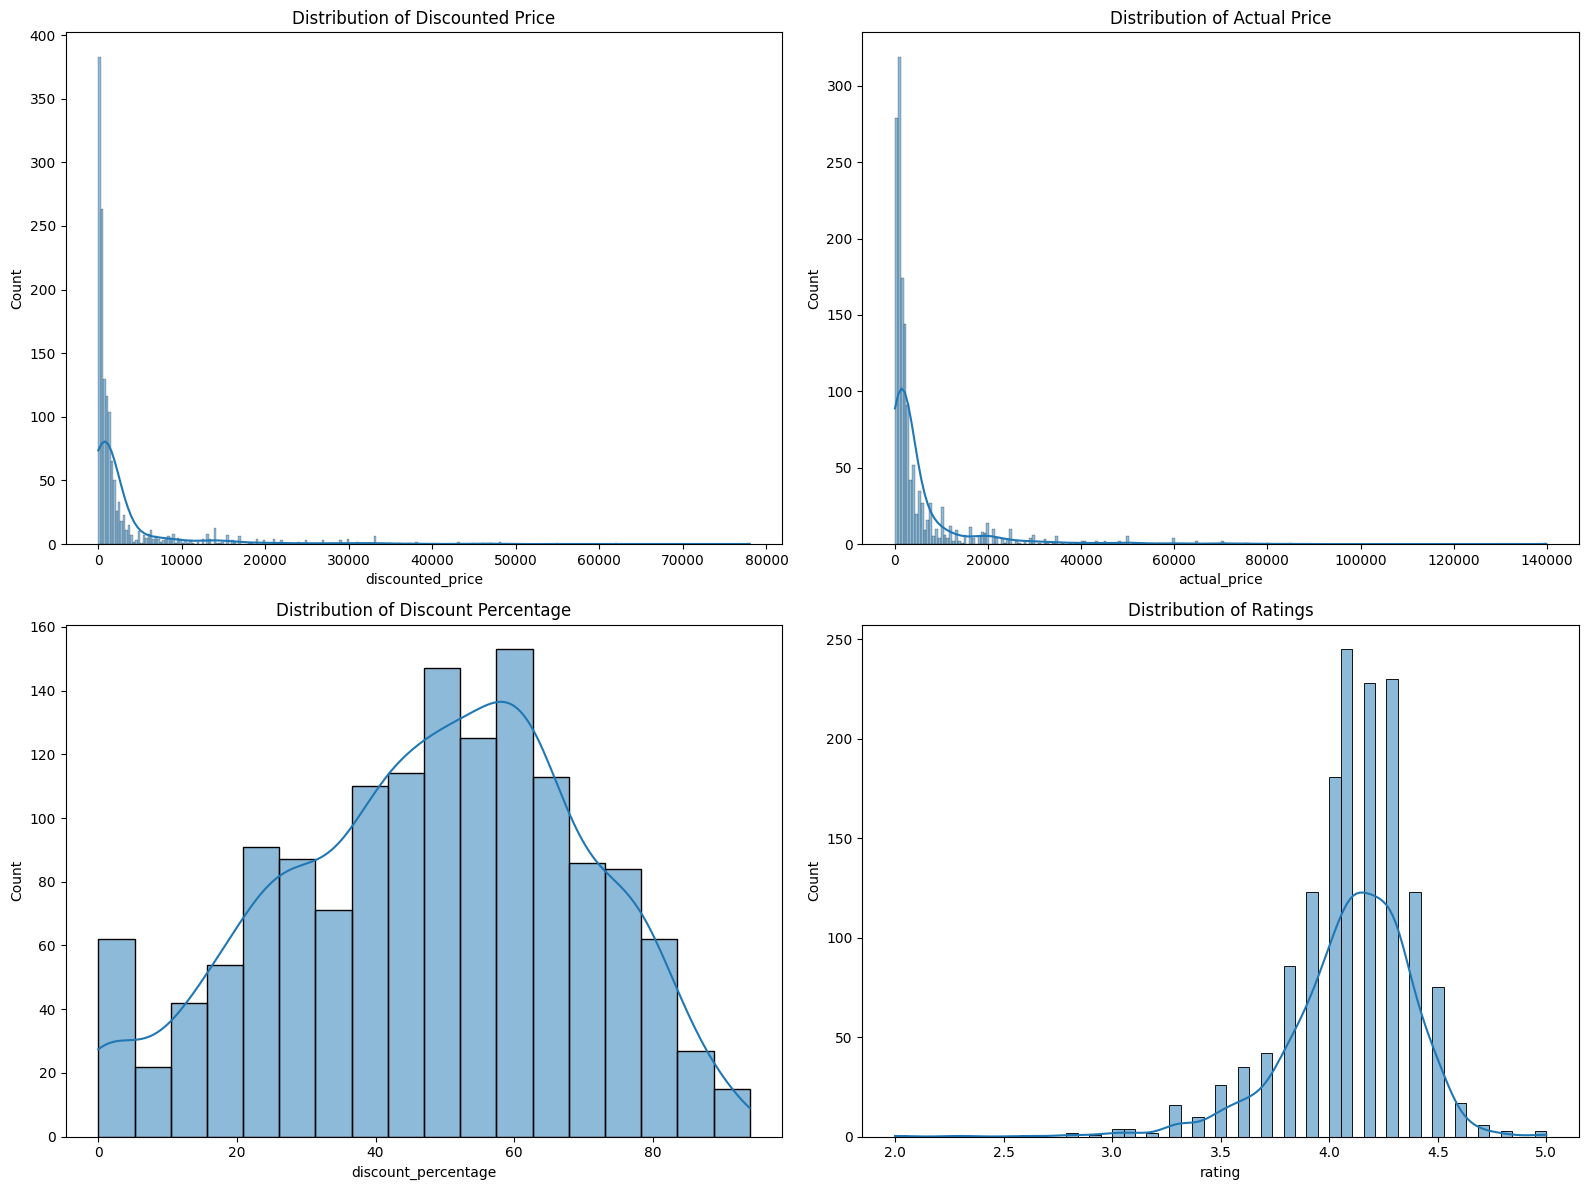

In [10]:

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(df['discounted_price'], kde=True, ax=axes[0,0])
axes[0,0].set_title("Distribution of Discounted Price")

sns.histplot(df['actual_price'], kde=True, ax=axes[0,1])
axes[0,1].set_title("Distribution of Actual Price")

sns.histplot(df['discount_percentage'], kde=True, ax=axes[1,0])
axes[1,0].set_title("Distribution of Discount Percentage")

sns.histplot(df['rating'], kde=True, ax=axes[1,1])
axes[1,1].set_title("Distribution of Ratings")

plt.tight_layout()
plt.show()

## 3.2 Count of Products by Rating

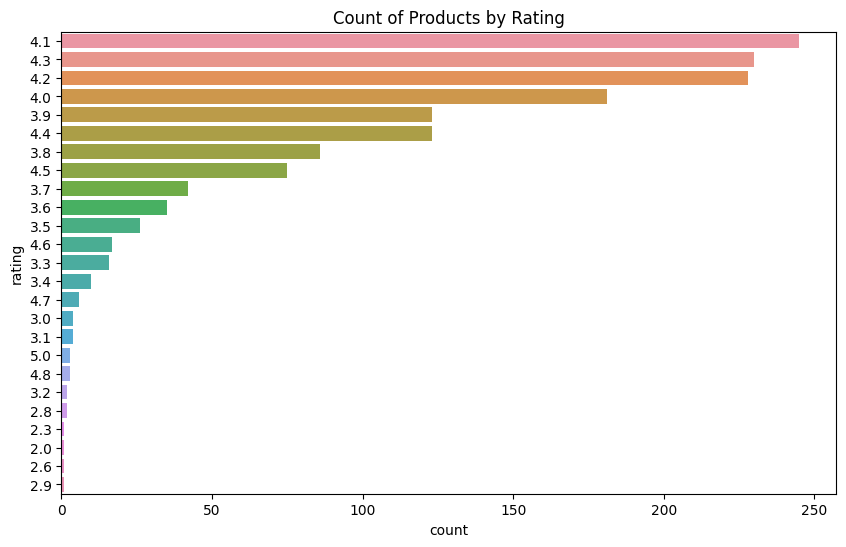

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index)
plt.title("Count of Products by Rating")
plt.show()

## 3.3 Price vs Rating

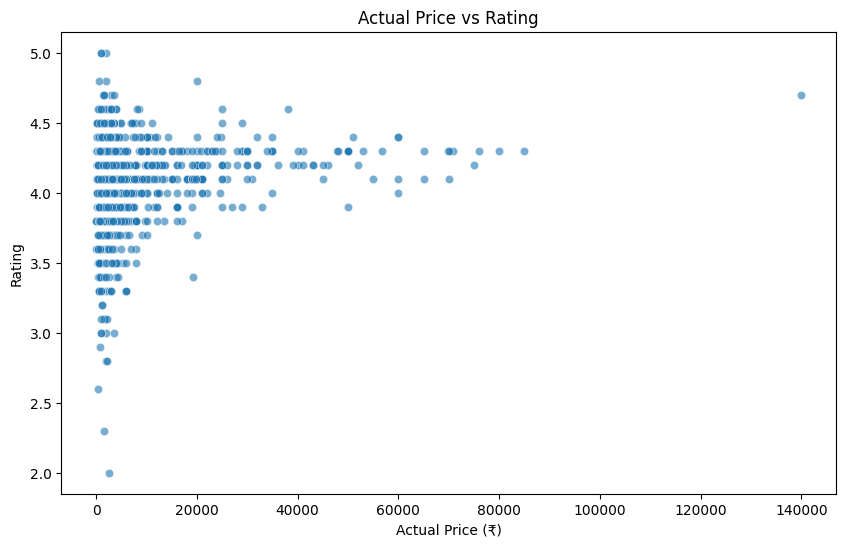

In [12]:

plt.figure(figsize=(10,6))
sns.scatterplot(x="actual_price", y="rating", data=df, alpha=0.6)
plt.title("Actual Price vs Rating")
plt.xlabel("Actual Price (₹)")
plt.ylabel("Rating")
plt.show()


# 🔹 Advanced Visualization
## 3.4 Correlation Heatmap

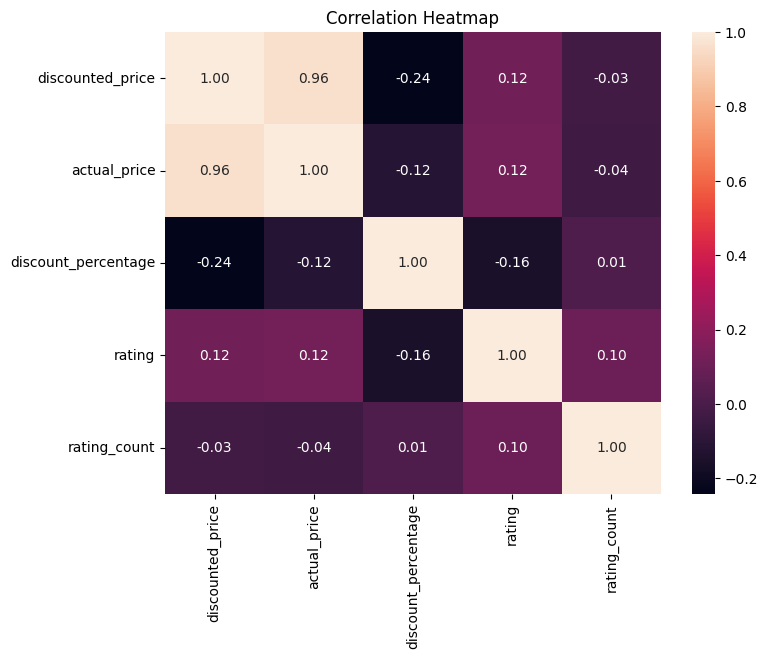

In [13]:

plt.figure(figsize=(8,6))
corr = df[['discounted_price','actual_price','discount_percentage','rating','rating_count']].corr()
sns.heatmap(corr, annot=True,  fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 3.5 Share of Products by Rating (%)


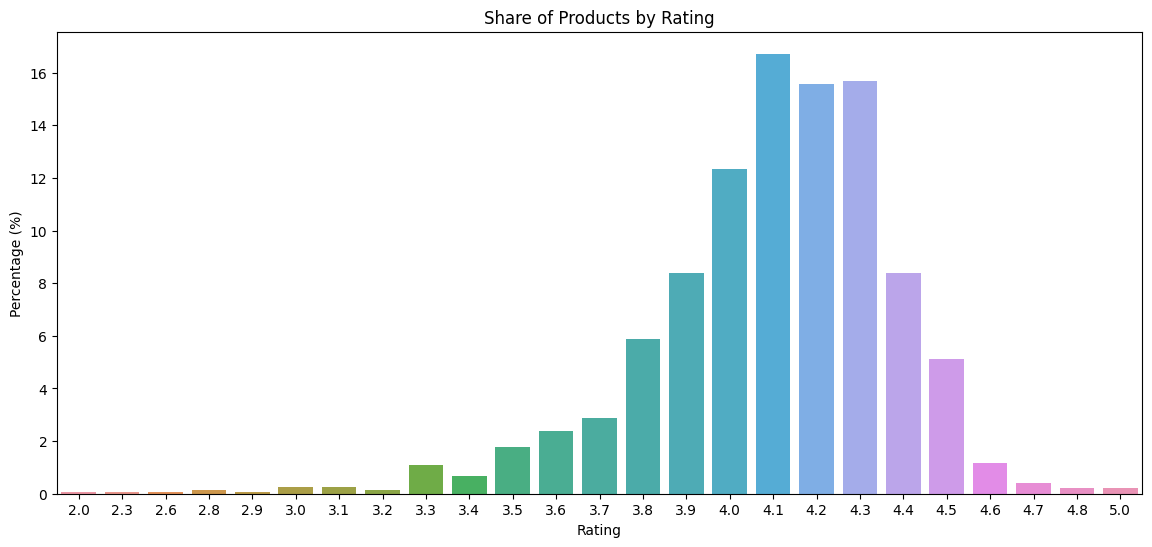

In [14]:

plt.figure(figsize=(14,6))
rating_counts = df['rating'].value_counts(normalize=True) * 100
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.ylabel("Percentage (%)")
plt.xlabel("Rating")
plt.title("Share of Products by Rating")
plt.show()


# 3.6 Top 10 Product Categories


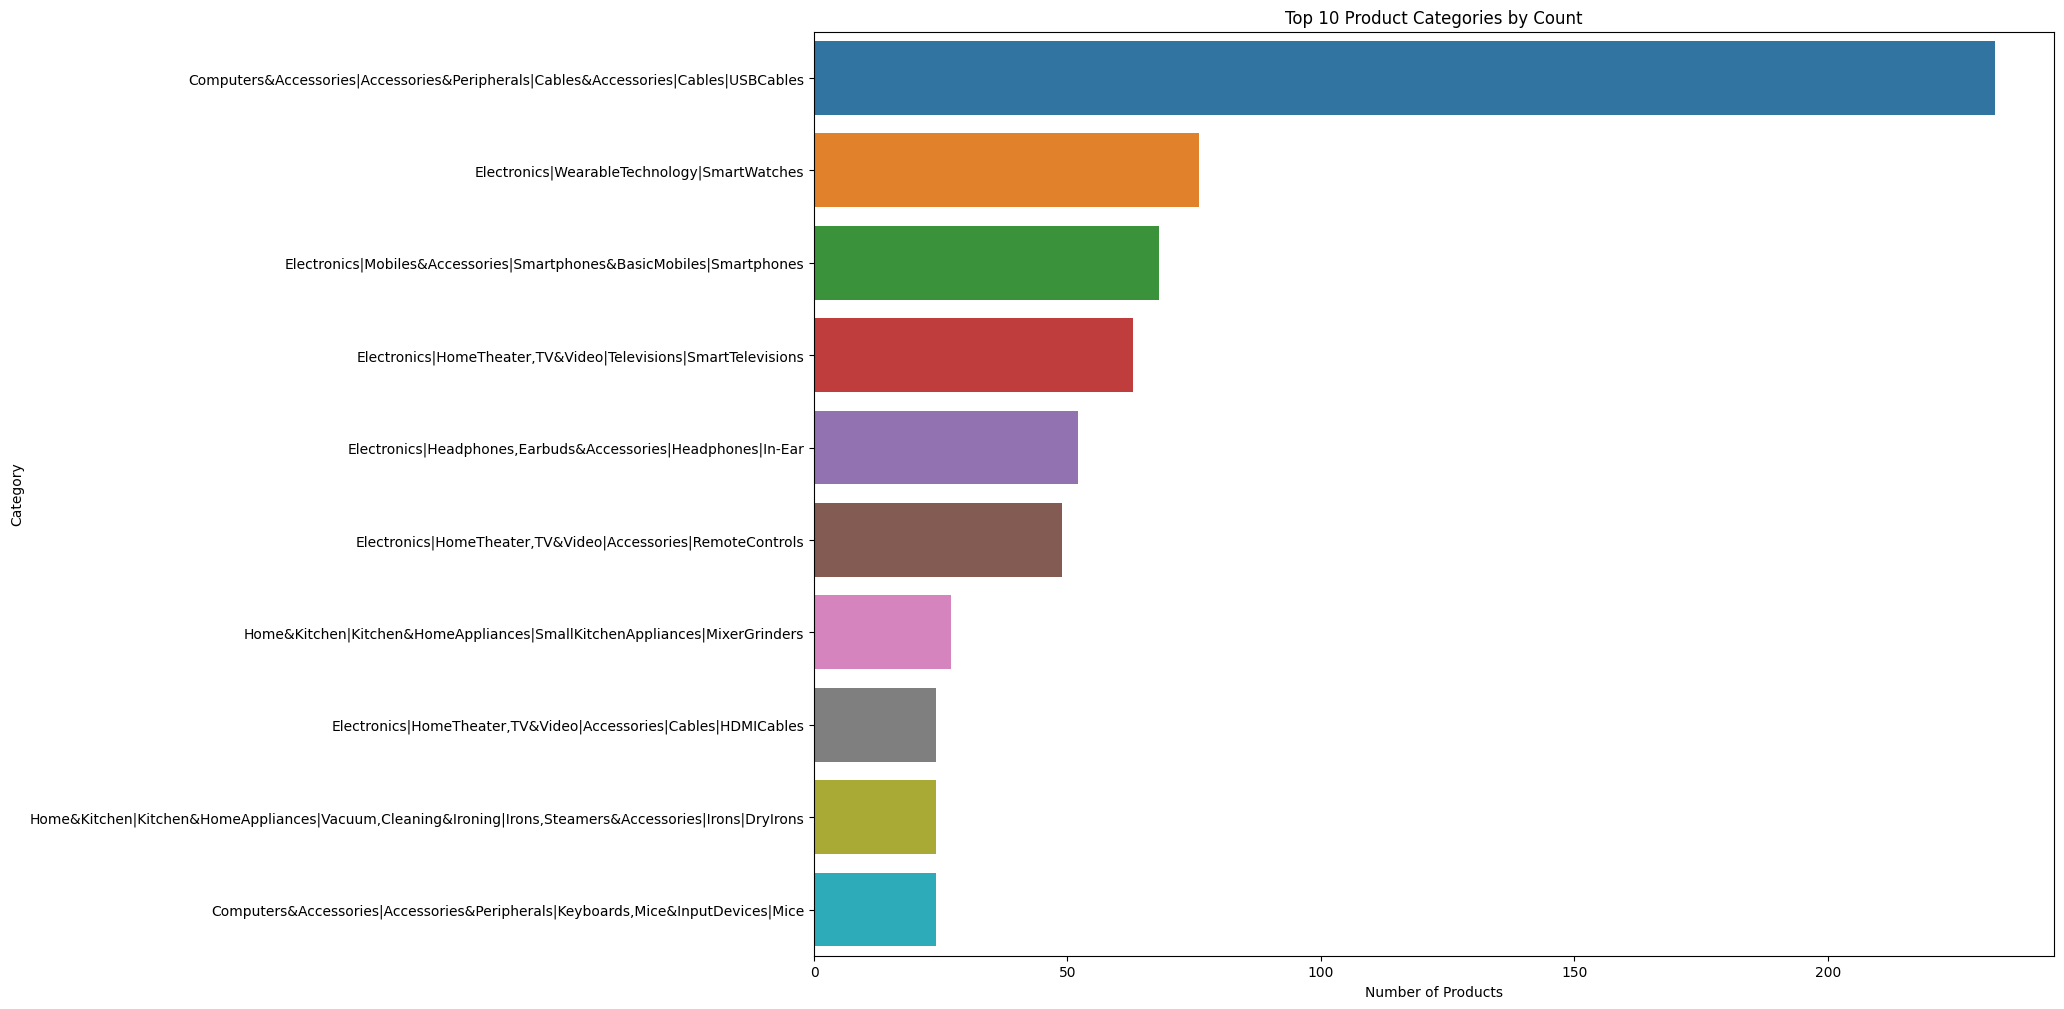

In [15]:

plt.figure(figsize=(16,12))
top_categories = df['category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 10 Product Categories by Count")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.show()

## 🧩 Observations from Visualizations

## 💰 Price Distribution (Discounted & Actual)
- Both price variables show a **right-skewed** distribution.  
- The majority of products are in the **low to mid-price range**.  
- **High-end items** are uncommon, indicating only a few premium listings.

## 🎯 Discount Percentage
- Discount percentages vary, but most fall between **40% and 70%**.  
- This suggests Amazon frequently offers **large discounts** to attract buyers.

## ⭐ Rating Distribution
- Most ratings are between **3.5 and 4.5 stars**, with a visible peak near **4.0**.  
- Reflects **high customer satisfaction** and good product quality.  
- Only a small number of products have ratings below 3.

## 🥧 Share of Products by Rating
- Nearly **95% of products** hold ratings around **4 stars or above**.  
- Indicates that the dataset is dominated by **positive reviews**.

## 📊 Count of Products by Exact Rating
- The most frequent ratings are **4.0, 4.1, 4.2, and 4.3**.  
- Few products have neutral or low ratings, showing **strong seller reputation** and **customer trust**.


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">4. Encoding</p>

## 4.1 Encoding Categorical Variables

- Before training our model, we need to convert categorical features into numeric form since most machine learning algorithms work with numerical data only.

- We’ll use Label Encoding to transform each categorical column into numerical codes.


In [16]:

# 2. Encoding Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">5. Applying Mechine Learning Algorithm</p>

## 🎯 Project Overview 

- **Objective:** Predict the **discounted price** of Amazon products using product attributes.  
- **Type:** Regression  
- **Target Variable:** `discounted_price`  
- **Input Features:** actual price, discount percentage, rating, rating count, category, engineered features (e.g., discount_rate)  
- **Evaluation Metrics:** RMSE, MAE, R² Score

## 6.1 Train & Test Split

In [17]:

X = df.drop(columns=["discounted_price"])   # Drop the Target Features
y = df["discounted_price"]                  # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1172, 15)
Test shape: (293, 15)


## 5.2 Here we apply both Baseline Models and Advanced Models to evaluate and compare their performance in predicting the target variable accurately.

### To measure how well our regression models perform, we define a helper function evaluate_model() that computes key evaluation metrics:

- RMSE (Root Mean Squared Error):
Measures the average magnitude of prediction errors. Lower RMSE indicates better model performance.

- MAE (Mean Absolute Error):
Represents the average of the absolute differences between predicted and actual values.

- R² Score (Coefficient of Determination):
Shows how well the model explains the variability of the target variable.
Closer to 1 → better fit.

In [18]:
# Function to evaluate the models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}


## 5.3 We will train and evaluate the following regression models:

🔹 Linear Regression

🔹 Decision Tree Regressor

🔹 Random Forest Regressor

🔹 Gradient Boosting Regressor

🔹 XGBoost Regressor

Each model will be evaluated based on RMSE, MAE, and R² Score, and their performance will be visualized using a bar plot.

In [19]:


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1)
}

# Evaluate each model
results = {}
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = scores

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="RMSE", ascending=True)
display(results_df)

,RMSE,MAE,R2
XGBoost Regressor,1147.811757,239.855080,0.973951
Gradient Boosting Regressor,1204.580680,292.871250,0.971311
Random Forest Regressor,1352.460739,293.027294,0.963834
Linear Regression,1775.399810,836.157354,0.937678
Decision Tree Regressor,2725.105778,540.758942,0.853170


## 5.4 Plot comparison and find out best model

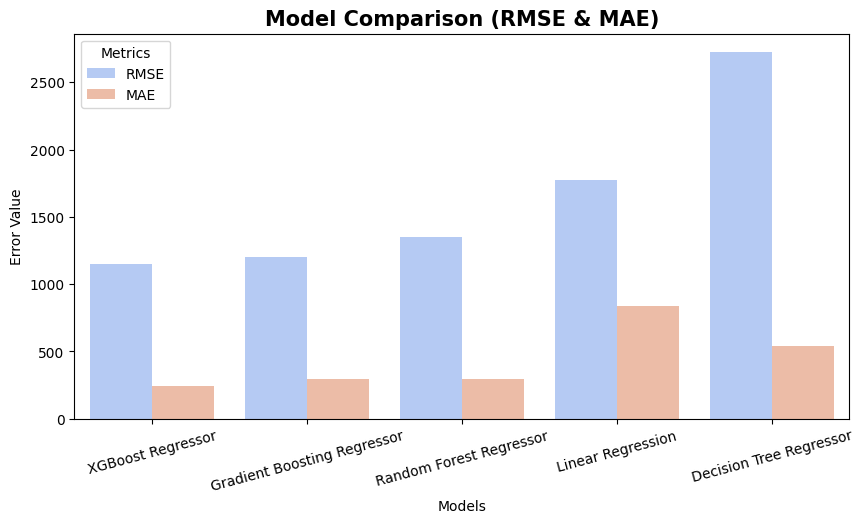

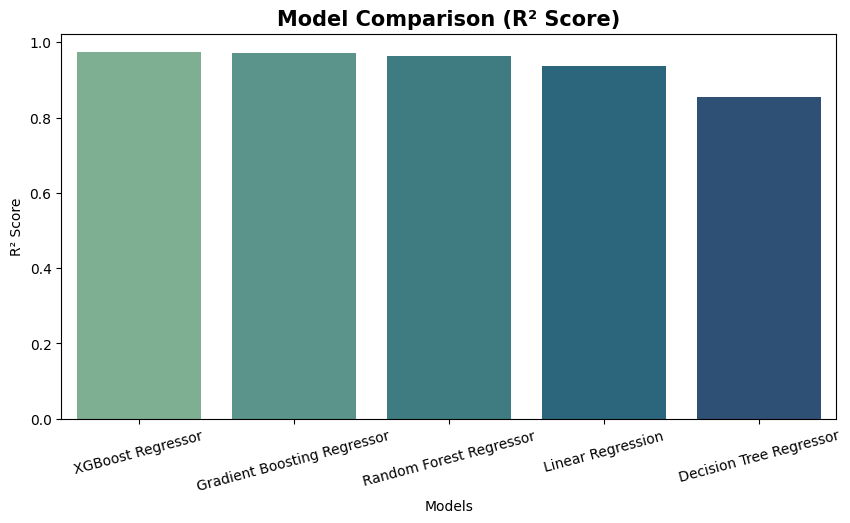

In [20]:
# Plot RMSE and MAE
plt.figure(figsize=(10,5))
sns.barplot(data=results_df[['RMSE','MAE']].reset_index().melt(id_vars='index'),
            x='index', y='value', hue='variable', palette='coolwarm')
plt.title("Model Comparison (RMSE & MAE)", fontsize=15, fontweight='bold')
plt.xlabel("Models")
plt.ylabel("Error Value")
plt.xticks(rotation=15)
plt.legend(title="Metrics")
plt.show()

# Plot R² separately
plt.figure(figsize=(10,5))
sns.barplot(data=results_df[['R2']].reset_index(),
            x='index', y='R2', palette='crest')
plt.title("Model Comparison (R² Score)", fontsize=15, fontweight='bold')
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.xticks(rotation=15)
plt.show()

## 5.5 Now we’ll:

- Select the best model (based on lowest RMSE)

- Retrain it fully on the training data

- Plot predicted vs actual values

- Show final accuracy metrics

 Best Model: XGBoost Regressor

 Model Performance on Test Data
RMSE: 1147.8118
MAE:  239.8551
R²:   0.9740


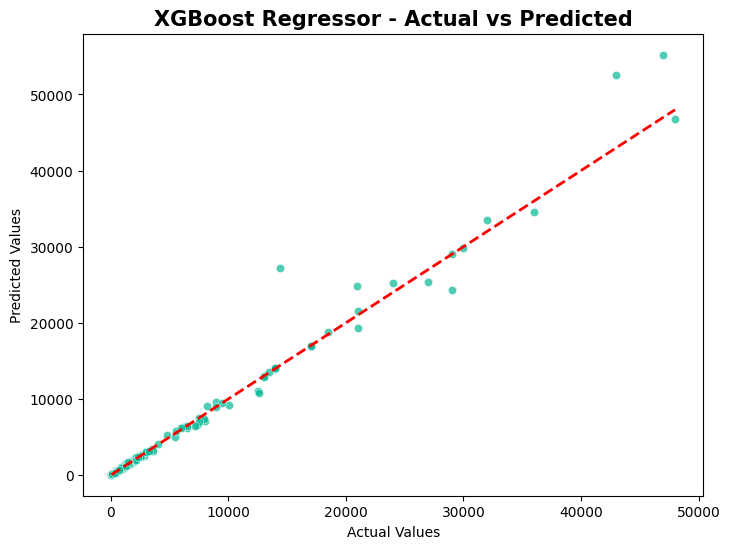

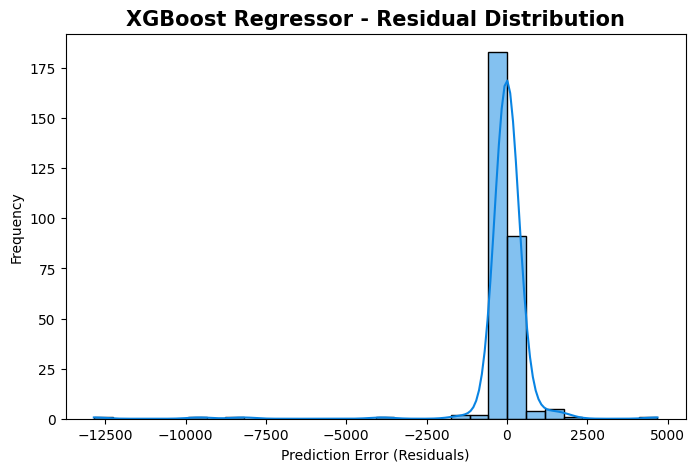

In [21]:
# Identify best model based on lowest RMSE
best_model_name = results_df["RMSE"].idxmin()
print(f" Best Model: {best_model_name}")
      
# Retrieve the best model object
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n Model Performance on Test Data")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="#00b894")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"{best_model_name} - Actual vs Predicted", fontsize=15, fontweight='bold')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color="#0984e3")
plt.title(f"{best_model_name} - Residual Distribution", fontsize=15, fontweight='bold')
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.show()
